In [1]:
"""
To make sure the fusion decomposition works
up to the part where we would stitch the sublimbs together into one limb


"""

'\nTo make sure the fusion decomposition works\nup to the part where we would stitch the sublimbs together into one limb\n\n\n'

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
import skeleton_utils as sk
import soma_extraction_utils as sm
import trimesh_utils as tu
import trimesh
import numpy_utils as nu
import numpy as np
from importlib import reload
import networkx as nx
import time
import compartment_utils as cu
import networkx_utils as xu
import matplotlib_utils as mu
import neuron_utils as nru

#importing at the bottom so don't get any conflicts
import itertools
from tqdm_utils import tqdm

#for meshparty preprocessing
import meshparty_skeletonize as m_sk
import general_utils as gu
import compartment_utils as cu
from meshparty import trimesh_io
from copy import deepcopy


from neuron_utils import *


# Loading the Neuron

In [4]:
import trimesh_utils as tu
curent_neuron = tu.load_mesh_no_processing("/notebooks/test_neurons/Segmentation_2/864691136739250798_double_soma_inhibit_stretched.off")
segment_id = 864691136739250798
description = "double_soma_inhibit_stretched"

In [5]:
import neuron_visualizations as nviz
nviz.plot_objects(main_mesh=curent_neuron)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Setting the Arguments that would be present inside a preprocessing function call

In [6]:
#predefined arguments for the Neuron constructor

decomposition_type="meshafterparty"
mesh_correspondence="meshparty" #meshafterparty_adaptive
distance_by_mesh_center=True #how the distance is calculated for mesh correspondence
meshparty_segment_size = 100
meshparty_n_surface_downsampling = 2
meshparty_adaptive_correspondence_after_creation=False
suppress_preprocessing_print=True
computed_attribute_dict=None
somas = None
branch_skeleton_data=None
combine_close_skeleton_nodes = True
combine_close_skeleton_nodes_threshold=700
ignore_warnings=True
suppress_output=False
calculate_spines=True
widths_to_calculate=["no_spine_median_mesh_center",
                "no_spine_mean_mesh_center"]
fill_hole_size=2000

In [7]:
#arguments for the preprocess neuron
mesh = curent_neuron
segment_id=segment_id
description=description

sig_th_initial_split=15 #for significant splitting meshes in the intial mesh split
limb_threshold = 2000 #the mesh faces threshold for a mesh to be qualified as a limb (otherwise too small)
filter_end_node_length=4001 #used in cleaning the skeleton during skeletonizations
return_no_somas = False

decomposition_type=decomposition_type
mesh_correspondence=mesh_correspondence
distance_by_mesh_center=distance_by_mesh_center
meshparty_segment_size =meshparty_segment_size
meshparty_n_surface_downsampling = meshparty_n_surface_downsampling
somas=somas
branch_skeleton_data=branch_skeleton_data
combine_close_skeleton_nodes = combine_close_skeleton_nodes
combine_close_skeleton_nodes_threshold=combine_close_skeleton_nodes_threshold

# Setting up the metadata

In [8]:
whole_processing_tiempo = time.time()


"""
Purpose: To process the mesh into a format that can be loaded into the neuron class
and used for higher order processing (how to visualize is included)

"""
if description is None:
    description = "no_description"
if segment_id is None:
    #pick a random segment id
    segment_id = np.random.randint(100000000)
    print(f"picking a random 7 digit segment id: {segment_id}")
    description += "_random_id"


if mesh is None:
    if current_mesh_file is None:
        raise Exception("No mesh or mesh_file file were given")
    else:
        current_neuron = trimesh.load_mesh(current_mesh_file)
else:
    current_neuron = mesh

# ************************ Phase A: Soma and Limb Identification ********************************

In [9]:
# --- 1) Doing the soma detection
if somas is None:
    soma_mesh_list,run_time,total_soma_list_sdf = sm.extract_soma_center(segment_id,
                                             current_neuron.vertices,
                                             current_neuron.faces)
else:
    soma_mesh_list,run_time,total_soma_list_sdf = somas

# geting the soma centers
if len(soma_mesh_list) <= 0:
    print(f"**** No Somas Found for Mesh {segment_id} so just one mesh")
    soma_mesh_list_centers = []
    if return_no_somas:
        return_value= soma_mesh_list_centers
    raise Exception("Processing of No Somas is not yet implemented yet")
else:
    #compute the soma centers
    print(f"Soma List = {soma_mesh_list}")

    soma_mesh_list_centers = sm.find_soma_centroids(soma_mesh_list)
    print(f"soma_mesh_list_centers = {soma_mesh_list_centers}")

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 15000.0 
large_mesh_threshold_inner = 10000.0 
soma_size_threshold = 937.5 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
xvfb-run -n 6586 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/864691136739250798/neuron_864691136739250798.off -o /notebooks/Platinum_Decomp_Fusion/864691136739250798/neuron_864691136739250798_decimated.off -s /notebooks/Platinum_Decomp_Fusion/864691136739250798/decimation_meshlab_25386424.mls
Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(200678, 3), faces.shape=(399939, 3))>]
----- working on large mesh #0: <trimesh.Trimesh(vertices.shape=(200678, 3), faces.shape=(399939, 3))>
pre_largest_mesh_path = /notebooks/Platinum_Decomp_Fusion/864691136739250798/neuron_864691136739250798_decimated_largest_piece.off
xvfb-run -n 9402 -s "-screen 0 800x600x24" meshlabserver $@  -i /noteb

# total split meshes = 27
viable_meshes = [0]
There were 26 pieces found after size threshold
# of soma containing seperate meshes = 1
meshes with somas = {0: [0]}


----Working on soma-containing mesh piece 0----
current_soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(2372, 3), faces.shape=(4676, 3))>]
current_mesh = <trimesh.Trimesh(vertices.shape=(200678, 3), faces.shape=(399444, 3))>

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(132379, 3), faces.shape=(261570, 3))>, <trimesh.Trimesh(vertices.shape=(34694, 3), faces.shape=(69173, 3))>, <trimesh.Trimesh(vertices.shape=(11463, 3), faces.shape=(22911, 3))>, <trimesh.Trimesh(vertices.shape=(10566, 3), faces.shape=(21011, 3))>, <trimesh.Trimesh(vertices.shape=(2221, 3), faces.shape=(4393, 3))>, <trimesh.Trimesh(vertices.shape=(2003, 3), faces.shape=(3958, 3))>]
There were 6 pieces found after size threshold
mesh pieces in subtact soma AFTER the filtering in

In [10]:
#--- 2) getting the soma submeshes that are connected to each soma and identifiying those that aren't (and eliminating any mesh pieces inside the soma)

main_mesh_total = current_neuron


#finding the mesh pieces that contain the soma
#splitting the current neuron into distinct pieces
split_meshes = tu.split_significant_pieces(
                            main_mesh_total,
                            significance_threshold=sig_th_initial_split,
                            print_flag=False)

print(f"# total split meshes = {len(split_meshes)}")


#returns the index of the split_meshes index that contains each soma    
containing_mesh_indices = sm.find_soma_centroid_containing_meshes(soma_mesh_list,
                                        split_meshes)

# filtering away any of the inside floating pieces: 
non_soma_touching_meshes = [m for i,m in enumerate(split_meshes)
                 if i not in list(containing_mesh_indices.values())]


#Adding the step that will filter away any pieces that are inside the soma
if len(non_soma_touching_meshes) > 0 and len(soma_mesh_list) > 0:
    """
    *** want to save these pieces that are inside of the soma***
    """

    non_soma_touching_meshes,inside_pieces = sm.filter_away_inside_soma_pieces(soma_mesh_list,non_soma_touching_meshes,
                                    significance_threshold=sig_th_initial_split,
                                    return_inside_pieces = True)                                                      


split_meshes # the meshes of the original mesh
containing_mesh_indices #the mapping of each soma centroid to the correct split mesh
soma_containing_meshes = sm.grouping_containing_mesh_indices(containing_mesh_indices)

soma_touching_meshes = [split_meshes[k] for k in soma_containing_meshes.keys()]


#     print(f"# of non soma touching seperate meshes = {len(non_soma_touching_meshes)}")
#     print(f"# of inside pieces = {len(inside_pieces)}")
print(f"# of soma containing seperate meshes = {len(soma_touching_meshes)}")
print(f"meshes with somas = {soma_containing_meshes}")






# total split meshes = 85
There were 84 pieces found after size threshold
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}


In [11]:
tu = reload(tu)
#--- 3)  Soma Extraction was great (but it wasn't the original soma faces), so now need to get the original soma faces and the original non-soma faces of original pieces

#     sk.graph_skeleton_and_mesh(other_meshes=[soma_meshes])

"""
for each soma touching mesh get the following:
1) original soma meshes
2) significant mesh pieces touching these somas
3) The soma connectivity to each of the significant mesh pieces
-- later will just translate the 


Process: 

1) Final all soma faces (through soma extraction and then soma original faces function)
2) Subtact all soma faces from original mesh
3) Find all significant mesh pieces
4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all
   the available somas
Conclusion: Will have connectivity map


"""

soma_touching_mesh_data = dict()

for z,(mesh_idx, soma_idxes) in enumerate(soma_containing_meshes.items()):
    soma_touching_mesh_data[z] = dict()
    print(f"\n\n----Working on soma-containing mesh piece {z}----")

    #1) Final all soma faces (through soma extraction and then soma original faces function)
    current_mesh = split_meshes[mesh_idx]

    current_soma_mesh_list = [soma_mesh_list[k] for k in soma_idxes]

    current_time = time.time()
    mesh_pieces_without_soma = sm.subtract_soma(current_soma_mesh_list,current_mesh,
                                                significance_threshold=250)
    print(f"Total time for Subtract Soam = {time.time() - current_time}")
    current_time = time.time()

    mesh_pieces_without_soma_stacked = tu.combine_meshes(mesh_pieces_without_soma)

    # find the original soma faces of mesh
    soma_faces = tu.original_mesh_faces_map(current_mesh,mesh_pieces_without_soma_stacked,matching=False)
    print(f"Total time for Original_mesh_faces_map for mesh_pieces without soma= {time.time() - current_time}")
    current_time = time.time()
    soma_meshes = current_mesh.submesh([soma_faces],append=True,repair=False)

    # finding the non-soma original faces
    non_soma_faces = tu.original_mesh_faces_map(current_mesh,soma_meshes,matching=False)
    non_soma_stacked_mesh = current_mesh.submesh([non_soma_faces],append=True,repair=False)

    print(f"Total time for Original_mesh_faces_map for somas= {time.time() - current_time}")
    current_time = time.time()

    # 3) Find all significant mesh pieces
    sig_non_soma_pieces,insignificant_limbs = tu.split_significant_pieces(non_soma_stacked_mesh,significance_threshold=limb_threshold,
                                                     return_insignificant_pieces=True)

    print(f"Total time for sig_non_soma_pieces= {time.time() - current_time}")
    current_time = time.time()

    soma_touching_mesh_data[z]["branch_meshes"] = sig_non_soma_pieces

    #4) Backtrack significant mesh pieces to orignal mesh and find connectivity of each to all the available somas
    # get all the seperate mesh faces

    #How to seperate the mesh faces
    seperate_soma_meshes,soma_face_components = tu.split(soma_meshes,only_watertight=False)
    #take the top largest ones depending how many were originally in the soma list
    seperate_soma_meshes = seperate_soma_meshes[:len(soma_mesh_list)]
    soma_face_components = soma_face_components[:len(soma_mesh_list)]

    soma_touching_mesh_data[z]["soma_meshes"] = seperate_soma_meshes

    print(f"Total time for split= {time.time() - current_time}")
    current_time = time.time()



    soma_to_piece_connectivity = dict()
    soma_to_piece_touching_vertices = dict()
    soma_to_piece_touching_vertices_idx = dict()
    limb_root_nodes = dict()
    
    m_vert_graph = tu.mesh_vertex_graph(current_mesh)
    
    for i,curr_soma in enumerate(seperate_soma_meshes):
        (connected_mesh_pieces,
         connected_mesh_pieces_vertices,
         connected_mesh_pieces_vertices_idx) = tu.mesh_pieces_connectivity(
                        main_mesh=current_mesh,
                        central_piece=curr_soma,
                        periphery_pieces = sig_non_soma_pieces,
                        return_vertices = True,
                        return_vertices_idx=True)
        #print(f"soma {i}: connected_mesh_pieces = {connected_mesh_pieces}")
        soma_to_piece_connectivity[i] = connected_mesh_pieces

        soma_to_piece_touching_vertices[i] = dict()
        for piece_index,piece_idx in enumerate(connected_mesh_pieces):
            limb_root_nodes[piece_idx] = connected_mesh_pieces_vertices[piece_index][0]
            
            """ Old way of finding vertex connected components on a mesh without trimesh function
            #find the number of touching groups and save those 
            soma_touching_graph = m_vert_graph.subgraph(connected_mesh_pieces_vertices_idx[piece_index])
            soma_con_comp = [current_mesh.vertices[np.array(list(k)).astype("int")] for k in list(nx.connected_components(soma_touching_graph))]
            soma_to_piece_touching_vertices[i][piece_idx] = soma_con_comp
            """
            
            soma_to_piece_touching_vertices[i][piece_idx] = tu.split_vertex_list_into_connected_components(
                                                vertex_indices_list=connected_mesh_pieces_vertices_idx[piece_index],
                                                mesh=current_mesh, 
                                                vertex_graph=m_vert_graph, 
                                                return_coordinates=True
                                               )
            
            
            
            

#         border_debug = False
#         if border_debug:
#             print(f"soma_to_piece_connectivity = {soma_to_piece_connectivity}")
#             print(f"soma_to_piece_touching_vertices = {soma_to_piece_touching_vertices}")


    print(f"Total time for mesh_pieces_connectivity= {time.time() - current_time}")

    soma_touching_mesh_data[z]["soma_to_piece_connectivity"] = soma_to_piece_connectivity

print(f"# of insignificant_limbs = {len(insignificant_limbs)} with trimesh : {insignificant_limbs}")



# Lets have an alert if there was more than one soma disconnected meshes
if len(soma_touching_mesh_data.keys()) > 1:
    raise Exception("More than 1 disconnected meshes that contain somas")

current_mesh_data = soma_touching_mesh_data
soma_containing_idx = 0

#doing inversion of the connectivity and touching vertices
piece_to_soma_touching_vertices = gu.flip_key_orders_for_dict(soma_to_piece_touching_vertices)


# ****Soma Touching mesh Data has the branches and the connectivity (So this is where you end up skipping if you don't have somas)***



----Working on soma-containing mesh piece 0----

inside Soma subtraction
mesh pieces in subtact soma BEFORE the filtering inside pieces = [<trimesh.Trimesh(vertices.shape=(231460, 3), faces.shape=(461762, 3))>, <trimesh.Trimesh(vertices.shape=(195047, 3), faces.shape=(388647, 3))>, <trimesh.Trimesh(vertices.shape=(138270, 3), faces.shape=(276291, 3))>, <trimesh.Trimesh(vertices.shape=(45997, 3), faces.shape=(91849, 3))>, <trimesh.Trimesh(vertices.shape=(45927, 3), faces.shape=(91679, 3))>, <trimesh.Trimesh(vertices.shape=(43906, 3), faces.shape=(87297, 3))>, <trimesh.Trimesh(vertices.shape=(21215, 3), faces.shape=(42237, 3))>, <trimesh.Trimesh(vertices.shape=(18493, 3), faces.shape=(36854, 3))>, <trimesh.Trimesh(vertices.shape=(8675, 3), faces.shape=(17298, 3))>, <trimesh.Trimesh(vertices.shape=(8084, 3), faces.shape=(16115, 3))>, <trimesh.Trimesh(vertices.shape=(505, 3), faces.shape=(1114, 3))>]
There were 11 pieces found after size threshold
mesh pieces in subtact soma AFTER the fi

/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


Total time for mesh_pieces_connectivity= 30.493839025497437
# of insignificant_limbs = 1 with trimesh : [<trimesh.Trimesh(vertices.shape=(505, 3), faces.shape=(1114, 3))>]


# Process that will start for each limb

In [12]:
sk = reload(sk)
tu = reload(tu)
cu = reload(cu)
m_sk = reload(m_sk)
pre = reload(pre)
xu = reload(xu)
nu = reload(nu)
gu = reload(gu)


proper_time = time.time()

#The containers that will hold the final data for the preprocessed neuron
limb_correspondence=dict()
limb_network_stating_info = dict()

# ---------- Part A: skeletonization and mesh decomposition --------- #
skeleton_time = time.time()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):
    
    #Arguments to pass to the specific function (when working with a limb)
    soma_touching_vertices_dict = piece_to_soma_touching_vertices[curr_limb_idx]
    
#     if curr_limb_idx != 10:
#         continue
    
    curr_limb_time = time.time()
    print(f"\n\n----- Working on Proper Limb # {curr_limb_idx} ---------")
    

    limb_correspondence_individual,network_starting_info = pre.preprocess_limb(mesh=limb_mesh_mparty,
                   soma_touching_vertices_dict = soma_touching_vertices_dict,
                   return_concept_network = False, 
                   return_concept_network_starting_info=True,
                   width_threshold_MAP=500,
                   size_threshold_MAP=2000,
                   surface_reconstruction_size=1000,                                                            
                   )
    #Storing all of the data to be sent to 
    
    limb_correspondence[curr_limb_idx] = limb_correspondence_individual
    limb_network_stating_info[curr_limb_idx] = network_starting_info
    
#     raise Exception("Done with #10")
    
    
print(f"Total time for Skeletonization and Mesh Correspondence = {time.time() - skeleton_time}")

pre=reload(pre)
neuron=reload(neuron)
nru = reload(nru)
# ---------- Part B: Stitching on floating pieces --------- #
floating_stitching_time = time.time()

limb_correspondence_with_floating_pieces = pre.attach_floating_pieces_to_limb_correspondence(
        limb_correspondence,
        floating_meshes=non_soma_touching_meshes,
        floating_piece_face_threshold = 600,
        max_stitch_distance=8000,
        distance_to_move_point_threshold = 4000,
        verbose = False)



print(f"Total time for stitching floating pieces = {time.time() - floating_stitching_time}")





# ---------- Part C: Computing Concept Networks --------- #
concept_network_time = time.time()

limb_concept_networks=dict()
limb_labels=dict()

for curr_limb_idx,limb_mesh_mparty in enumerate(current_mesh_data[0]["branch_meshes"]):
    limb_to_soma_concept_networks = pre.calculate_limb_concept_networks(limb_correspondence_with_floating_pieces[curr_limb_idx],
                                                                        run_concept_network_checks=True,
                                                                       **limb_network_stating_info[curr_limb_idx])   



    limb_concept_networks[curr_limb_idx] = limb_to_soma_concept_networks
    limb_labels[curr_limb_idx]= "Unlabeled"
    
print(f"Total time for Concept Networks = {time.time() - concept_network_time}")





preprocessed_data= dict(
    soma_meshes = current_mesh_data[0]["soma_meshes"],
    soma_to_piece_connectivity = current_mesh_data[0]["soma_to_piece_connectivity"],
    soma_sdfs = total_soma_list_sdf,
    insignificant_limbs=insignificant_limbs,
    non_soma_touching_meshes=non_soma_touching_meshes,
    inside_pieces=inside_pieces,
    limb_correspondence=limb_correspondence_with_floating_pieces,
    limb_concept_networks=limb_concept_networks,
    limb_network_stating_info=limb_network_stating_info,
    limb_labels=limb_labels,
    limb_meshes=current_mesh_data[0]["branch_meshes"],
    )

    

print(f"Total time for all limb decomps = {time.time() - proper_time}")

#864049.29563888 1004924.982468    884750.28428994

neuron_obj = neuron.Neuron(
                mesh=curent_neuron,
                 segment_id=segment_id,
                 description=description,
                 preprocessed_data=preprocessed_data,
#                  decomposition_type="meshafterparty",
#                  mesh_correspondence="meshparty", #meshafterparty_adaptive
#                  distance_by_mesh_center=True, #how the distance is calculated for mesh correspondence
#                  meshparty_segment_size = 0,
#                  meshparty_n_surface_downsampling = 0,
#                  meshparty_adaptive_correspondence_after_creation=False,
#                 suppress_preprocessing_print=True,
#                  computed_attribute_dict=None,
#                  somas = None,
#                  branch_skeleton_data=None,
#                  combine_close_skeleton_nodes = True,
#                 combine_close_skeleton_nodes_threshold=700,
    
    
                ignore_warnings=True,
                suppress_output=False,
                calculate_spines=True,
                widths_to_calculate=["no_spine_median_mesh_center"]
                )



----- Working on Proper Limb # 0 ---------
Time for preparing soma vertices and root: 1.0728836059570312e-05
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:06<00:00,  6.21s/it]

Time for 1st pass MP skeletonization: 8.527233362197876
branches_touching_root = [8]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 23558
Working on path [16360. 16370. 16379. 16386. 16394. 16406. 16421. 16426.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
Working on path [23558. 16454. 16479. 16503. 16512.]
path_degrees = [4, 2, 2, 2, 3]


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 48, len(kept_branches_idx) = 47
empty_indices % = 0.0
 conflict_indices % = 0.005089367120955848


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 18.304014682769775
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2297, 9382, 17720, 1695, 3368, 5984, 62, 3872, 13017, 3545, 9593, 6389, 7677, 3614, 2291, 11023, 17176, 14039, 21349, 1189, 13887, 1816, 1981, 15290, 44763, 5836]


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


mesh_large_connectivity: 1.5431194305419922
Finding MAP candidates connected components: 0.00032401084899902344
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.7245352268218994
Grouping MP Sublimbs by Graph: 0.1263728141784668
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0240476131439209
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 2569 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_329927.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 7038 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/P


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.10664057731628418
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 97.34837603569031
Checking connected components after removing cycles
Total time for mesh KDTree = 2.537684440612793
sbv[0].reshape(-1,3) = [[1437912.  809970.  725046.]]
closest_sk_pt_coord BEFORE = [1436820.  807395.  724736.]
current_skeleton.shape = (2234, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1436820.  807395.  724736.]
skipping soma 0 because closest skeleton node was already end node
sbv[0].reshape(-1,3) = [[1436148.   784371.6  691989.2]]
closest_sk_pt_coord BEFORE = [1435900.  784730.  691595.]
current_skeleton.shape = (2234, 2, 3)
Current stitch point was not a branch or endpoint, shortest_path_length to one = 11326.298417289774
change_status for create som


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2142, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 1 valid paths to replace
valid_paths = [array([874., 889.])]
valid_path_lengths = [562.2864038904017]
length of Graph = 2142
Working on path [874. 889.]
path_degrees = [3, 3]
skeletonize_and_clean_connected_branch_CGAL: 105.17794299125671
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 46.91855502128601
mesh_correspondence_first_pass: 46.918726444244385
Limb decomposed into 23 branches
divided_skeleton_graph_recovered = (2141, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2141, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (22, 23)
empty_indices % = 0.06538695024177849
 conflict_indices % = 0.02396014318310272



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
Took 0 iterations to expand the label back
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 165.22595381736755
correspondence_1_to_1: 13.104800939559937
Total time for MAP sublimb processing 165.22620511054993
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.010370731353759766
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.011249065399169922
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
MP filtering soma verts: 0.009998798370361328
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
MP filtering soma verts: 0.008870363235473633
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #4 ----
MP filtering soma verts: 0.0102691650390625
Do Not Need to Fix MP Decomposition 4 so just continuing
---- Working on MP Decomposition #5 ----
MP filtering soma verts: 0.011064767837524414
Do Not Need to Fix MP Decomp

/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.10854353688090931
 conflict_indices % = 0.0023210567634911424



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
winning_vertex = [1388755.49977569  772654.91108742  707521.06626941]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 45501.82996928718
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [2562, 2563.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03780732377627572
 conflict_indices % = 0.005006313600237689



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
winning_vertex = [1471867.02277849  795631.67822422  667378.56977204]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [17]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [37, 38.0]
Found winning edge: [403, 404.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08395188123880215
 conflict_indices % = 0.005758894292295879



AFTER face_lookup_resolved_test



 Finished with (2, 0) 




---- Working on (3, 0) connection-----
winning_vertex = [1419695.44112544  692752.13061389  605603.35788401]
MP_branches_with_stitch_point = [2, 3]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [66, 67.0]
Found winning edge: [85, 86.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.043428260145870534
 conflict_indices % = 0.011681748025300366



AFTER face_lookup_resolved_test



 Finished with (3, 0) 




---- Working on (4, 0) connection-----
winning_vertex = [1357014.50358753  726568.18403459  730283.44271789]
MP_branches_with_stitch_point = [0, 3]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [22, 24.0]
Found winning edge: [27, 28.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03215126545026486
 conflict_indices % = 0.0007357268981753973



AFTER face_lookup_resolved_test



 Finished with (4, 0) 




---- Working on (5, 0) connection-----
winning_vertex = [1446076.45475831  721724.57373318  669818.77566158]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [9]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [409, 411.0]
Found winning edge: [944, 945.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04976798358322087
 conflict_indices % = 0.00944704294614631



AFTER face_lookup_resolved_test



 Finished with (5, 0) 




---- Working on (6, 0) connection-----
winning_vertex = [1480222.41857644  733682.69058297  706598.68106975]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 68866.29008299786
MAP_branches_with_stitch_point = [20]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [14, 15.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.014830508474576272
 conflict_indices % = 0.006422139830508475



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (6, 0) 




---- Working on (7, 0) connection-----
winning_vertex = [1427207.87241372  724247.49109956  647898.11940133]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 63042.15075698234
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [1145, 1146.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0672136050933641
 conflict_indices % = 0.0013246165021578431



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (7, 0) 




---- Working on (8, 0) connection-----
winning_vertex = [1435727.50286592  804206.16988269  722230.75750163]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1138.7774145986564
MAP_branches_with_stitch_point = [5]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [205, 207.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


empty mesh_correspondence_indices_2 returned so returning original mesh correspondence



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.09814493283377501
 conflict_indices % = 0.004569130951293064



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (8, 0) 




---- Working on (9, 0) connection-----
winning_vertex = [1439793.08144105  778785.50548552  634675.11924144]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 33702.84627822051
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [16, 17.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11525189786059352
 conflict_indices % = 0.012508626639061422



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (9, 0) 




---- Working on (10, 0) connection-----
winning_vertex = [1438519.04468403  792568.06603921  699080.60705504]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 11571.621286693273
MAP_branches_with_stitch_point = [10]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [2002, 2003.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03803068812953026
 conflict_indices % = 0.006801280240986539



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (10, 0) 




---- Working on (11, 0) connection-----
winning_vertex = [1437220.5887214   807919.79292894  669784.36709947]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [13]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [884, 886.0]
Found winning edge: [819, 821.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.039263836079425435
 conflict_indices % = 0.018668145331643432



AFTER face_lookup_resolved_test



 Finished with (11, 0) 



Time for decomp of Limb = 325.925315618515


----- Working on Proper Limb # 1 ---------
Time for preparing soma vertices and root: 1.049041748046875e-05
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.24s/it]

Time for 1st pass MP skeletonization: 6.0436928272247314
branches_touching_root = [4]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 17250


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 39, len(kept_branches_idx) = 40
empty_indices % = 0.0
 conflict_indices % = 0.004893901149372052


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 12.021207094192505
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [740, 1562, 3785, 2304, 46494, 6319, 3218, 16376, 1480, 6499, 8617, 30952, 19202, 24996, 8172, 6894, 1270, 17954]


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


mesh_large_connectivity: 0.9209153652191162
Finding MAP candidates connected components: 0.0002677440643310547
len(filtered_pieces) = 3
skeleton_connectivity_MP : 1.3853578567504883
Grouping MP Sublimbs by Graph: 0.09721088409423828
Divinding into MP and MAP pieces: 1.6689300537109375e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00838160514831543
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 6870 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_246484.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 9512 -s "-screen 0 800x600x24" meshlabserver $@  -i /noteboo


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.038136959075927734
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 21.276843547821045
Checking connected components after removing cycles
Total time for mesh KDTree = 0.34247684478759766
sbv[0].reshape(-1,3) = [[1446679.   810835.4  738367.3]]
closest_sk_pt_coord BEFORE = [1448460.  810457.  739030.]
current_skeleton.shape = (563, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1448460.  810457.  739030.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1448460.,  810457.,  739030.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.5561738014221191
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1448460.  810457.  739030.]]
Numb


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (548, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 22.256795406341553
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 7.115675449371338
mesh_correspondence_first_pass: 7.115705251693726
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (548, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (548, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.04496213210622184
 conflict_indices % = 0.02147445115521043



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 31.540822744369507
correspondence_1_to_1: 2.1598329544067383
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.007889986038208008
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 9240 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_798248.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 6961 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_89924.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_89924_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_277140.m


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.033640146255493164
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.27453875541687
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.008545637130737305
filter_end_node_length = 4001
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (182, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 12.439292669296265
Working on limb correspondence for #1 MAP piece



Total time for decomposition = 1.75321626663208
mesh_correspondence_first_pass: 1.7532470226287842
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (182, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (182, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.06170371059239282
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 14.522870302200317
correspondence_1_to_1: 0.32251405715942383
--- Working on MAP piece 2---
MAP Filtering Soma Pieces: 0.015009403228759766
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 5446 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_858838.mls
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 2699 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_74044.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_74044_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_474922.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/neuro


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.07046651840209961
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 48.528990507125854
Checking connected components after removing cycles
Total time for mesh KDTree = 0.9013712406158447
sbv[0].reshape(-1,3) = [[1436113.   778669.2  698563.8]]
closest_sk_pt_coord BEFORE = [1435390.  778379.  698546.]
current_skeleton.shape = (921, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1435390.  778379.  698546.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1435390.,  778379.,  698546.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 1.2639381885528564
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1435390.  778379.  698546.]]
Number


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (841, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 51.44541954994202
Working on limb correspondence for #2 MAP piece



Total time for decomposition = 19.616175651550293
mesh_correspondence_first_pass: 19.616207361221313
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (841, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (841, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.21405990703821345
 conflict_indices % = 0.018554812161624353



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #2 mesh processing = 75.36015677452087
correspondence_1_to_1: 4.283445358276367
Total time for MAP sublimb processing 121.42458319664001
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.006354570388793945
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.005598306655883789
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
MP filtering soma verts: 0.006136655807495117
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
MP filtering soma verts: 0.005773067474365234
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #4 ----
MP filtering soma verts: 0.005705595016479492
Do Not Need to Fix MP Decomposition 4 so just continuing
---- Working on MP Decomposition #5 ----
MP filtering soma verts: 0.006075382232666016
Do Not Need to Fix MP Decomp

/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03543160558767337
 conflict_indices % = 0.007393990521797384



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (0, 0) 




---- Working on (3, 0) connection-----
winning_vertex = [1471305.77310423  782609.57222756  748816.23544915]
MP_branches_with_stitch_point = [0, 2]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1870.4781114888392
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [96, 97.0]
Only 2 skeleton nodes so cannot do smoothing


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.16053085401514583
 conflict_indices % = 0.0038989277948564146



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
winning_vertex = [1492774.0491756   796192.65360187  753479.79294428]
MP_branches_with_stitch_point = [0, 3]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [54, 55.0]
Only 2 skeleton nodes so cannot do smoothing


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0
 conflict_indices % = 0.035937902049918515



AFTER face_lookup_resolved_test



 Finished with (4, 0) 




---- Working on (5, 0) connection-----
winning_vertex = [1446027.60037284  672675.32916064  745461.5406669 ]
MP_branches_with_stitch_point = [0, 3]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [409, 410.0]
Found winning edge: [559, 560.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03046698301476784
 conflict_indices % = 0.006053483524768283



AFTER face_lookup_resolved_test



 Finished with (5, 0) 




---- Working on (1, 1) connection-----
winning_vertex = [1434703.21147613  565077.35163894  647099.27413294]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 8534.974453248748
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [52, 53.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05533327271073929
 conflict_indices % = 0.00486496317177412



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (1, 1) 




---- Working on (2, 1) connection-----
winning_vertex = [1436184.18827429  573169.70151598  649171.92267211]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [8, 10.0]
Found winning edge: [28, 29.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06412084719801404
 conflict_indices % = 0.009876934453071357



AFTER face_lookup_resolved_test



 Finished with (2, 1) 




---- Working on (6, 1) connection-----
winning_vertex = [1423029.37400503  494787.92513289  631590.19774757]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [583, 584.0]
Found winning edge: [269, 276.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05546327886514635
 conflict_indices % = 0.007227509427186209



AFTER face_lookup_resolved_test



 Finished with (6, 1) 




---- Working on (2, 2) connection-----
winning_vertex = [1439775.21525512  615911.11224046  655901.78994068]
MP_branches_with_stitch_point = [1, 2]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [436, 437.0]
Found winning edge: [785, 786.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.33673393861640183
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



 Finished with (2, 2) 




---- Working on (3, 2) connection-----
winning_vertex = [1474496.20871101  779857.0156144   748052.81436549]
MP_branches_with_stitch_point = [1, 2]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 30778.028160939306
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [7, 8.0]
Found winning edge: [63, 64.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.12596944770857815
 conflict_indices % = 0.01981981981981982



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (3, 2) 




---- Working on (7, 2) connection-----
winning_vertex = [1433346.41083757  750804.34838838  691210.32012046]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 11535.689503918999
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [1865, 1866.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07403274490075917
 conflict_indices % = 0.012915027897191988



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (7, 2) 




---- Working on (8, 2) connection-----
winning_vertex = [1469630.80073539  778278.09217993  743494.38563521]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 37880.43457896212
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [2, 4.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.11434678065722682
 conflict_indices % = 0.0011755276516163505



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (8, 2) 



Time for decomp of Limb = 253.50717544555664


----- Working on Proper Limb # 2 ---------
Time for preparing soma vertices and root: 6.198883056640625e-06
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:03<00:00,  3.74s/it]

Time for 1st pass MP skeletonization: 4.984225034713745
branches_touching_root = [5]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 17760
Working on path [3232. 3236.]
path_degrees = [3, 3]


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 70, len(kept_branches_idx) = 70
empty_indices % = 0.0
 conflict_indices % = 0.009537046085467859


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 11.81934928894043
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [10368, 6843, 7005, 5223, 1108, 9155, 7884, 8423, 12494, 11300, 848, 841, 15664, 12628, 28692, 3929]


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


mesh_large_connectivity: 0.5969135761260986
Finding MAP candidates connected components: 0.0003116130828857422
len(filtered_pieces) = 3
skeleton_connectivity_MP : 0.6402268409729004
Grouping MP Sublimbs by Graph: 0.0990755558013916
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00890040397644043
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 4497 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_736626.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 9813 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/P


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.08998632431030273
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 50.82731890678406
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.07861804962158203
filter_end_node_length = 4001
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1263, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 53.020283937454224
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 18.646058320999146
mesh_correspondence_first_pass: 18.646088361740112
Limb decomposed into 9 branches
divided_skeleton_graph_recovered = (1263, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1263, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (8, 9)
empty_indices % = 0.04101296892102557
 conflict_indices % = 0.012637235065839664



AFTER face_lookup_resolved_test



Total time for MAP sublimb #0 mesh processing = 74.8955991268158
correspondence_1_to_1: 3.2205095291137695
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.0028617382049560547
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 6340 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_986998.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 8932 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_66449.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_66449_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_937134.ml


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.02642035484313965
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 15.630228281021118
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0069501399993896484
filter_end_node_length = 4001
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (142, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 15.778310775756836
Working on limb correspondence for #1 MAP piece



Total time for decomposition = 1.5141191482543945
mesh_correspondence_first_pass: 1.5141816139221191
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (142, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (142, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.09202417982275955
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 18.684876918792725
correspondence_1_to_1: 1.389482021331787
--- Working on MAP piece 2---
MAP Filtering Soma Pieces: 0.0018663406372070312
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 155 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_570507.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 6689 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_63908.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_63908_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_908558.ml


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04788994789123535
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.22275710105896
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0017876625061035156
filter_end_node_length = 4001
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (17, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.282575845718384
Working on limb correspondence for #2 MAP piece



Total time for decomposition = 0.4515221118927002
mesh_correspondence_first_pass: 0.451552152633667
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (17, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (17, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.15601934334436243
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #2 mesh processing = 9.868317127227783
correspondence_1_to_1: 0.13222479820251465
Total time for MAP sublimb processing 103.45003199577332
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.006417274475097656
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.03695225715637207
sbv[0].reshape(-1,3) = [[1444486.   823346.2  736808.8]]
closest_sk_pt_coord BEFORE = [1445531.85754911  823056.12483474  734560.95615765]
current_skeleton.shape = (62, 2, 3)
Current stitch point was not a branch or endpoint, shortest_path_length to one = 2297.8669379042776
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1445531.85754911  823056.12483474  734560.95615765]
Adding new branch to skeleton
border_average_coordinate = [1444662.65822785  823144.67088608  735650.98227848]
endpoints_must_keep = {0: array([[1444662.65822785,  823144.67088608,  735650.98227848]])}
MP (because soma touching verts)




--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2526997840172786
 conflict_indices % = 0.21166306695464362



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



curr_width_median = 2991.4807236636675
curr_width_median = 2969.91498281188
curr_width_median = 2739.277985292506
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 1.1670312881469727
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.009720563888549805
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
MP filtering soma verts: 0.009871959686279297
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
MP filtering soma verts: 0.0027332305908203125
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition #4 ----
MP filtering soma verts: 0.00348663330078125
Do Not Need to Fix MP Decomposition 4 so just continuing
---- Working on MP Decomposition #5 ----
MP filtering soma verts: 0.002838611602783203
Do Not Need to Fix MP Decomposition 5 so just continuing
---- Working on MP Decomposition #6 ----
MP filter

/meshAfterParty/preprocessing_vp2.py:862: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([k for i,k in enumerate(segment_branches) if i not in match_sk_branches] + new_skeletal_branches)
/meshAfterParty/preprocessing_vp2.py:871: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  divided_submeshes_idx = np.array([k for i,k in enumerate(divided_submeshes_idx) if i not in match_sk_branches] + new_submeshes_idx)



---- Working on (0, 0) connection-----
winning_vertex = [1445719.16104432  826794.61623275  734415.68400737]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 2791.394194889444
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [34, 36.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08603819421013564
 conflict_indices % = 0.04946352655374857



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (0, 0) 




---- Working on (2, 0) connection-----
winning_vertex = [1412043.35401275  895145.18652299  752473.23551152]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [142, 143.0]
Found winning edge: [41, 42.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.03796095444685466
 conflict_indices % = 0.003796095444685466



AFTER face_lookup_resolved_test



 Finished with (2, 0) 




---- Working on (3, 0) connection-----
winning_vertex = [1462696.41917238  931213.95488982  771612.83694309]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [13, 14.0]
Found winning edge: [290, 291.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08731118869033216
 conflict_indices % = 0.006947564895786526



AFTER face_lookup_resolved_test



 Finished with (3, 0) 




---- Working on (4, 0) connection-----
winning_vertex = [1455619.88793698  891570.67842545  734609.40538881]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [9]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [27, 28.0]
Found winning edge: [717, 719.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04040842928524875
 conflict_indices % = 0.0012414263989323734



AFTER face_lookup_resolved_test



 Finished with (4, 0) 




---- Working on (5, 0) connection-----
winning_vertex = [1452398.73551976  969111.8538856   750026.37498946]
MP_branches_with_stitch_point = [0, 2]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [5]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [303, 304.0]
Found winning edge: [370, 371.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0522378089512358
 conflict_indices % = 0.007771097751057671



AFTER face_lookup_resolved_test



 Finished with (5, 0) 




---- Working on (6, 0) connection-----
winning_vertex = [1491433.10883244  886701.66141565  770647.0018805 ]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 53579.077753109
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [55, 56.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05122583217061989
 conflict_indices % = 0.004305361769982061



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (6, 0) 




---- Working on (8, 0) connection-----
winning_vertex = [1487328.2940605   853689.91913545  760656.45776723]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 46325.55670761162
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [73, 74.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.045039435450394356
 conflict_indices % = 0.0016604400166044002



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (8, 0) 




---- Working on (1, 1) connection-----
winning_vertex = [1360761.24282567  961800.40990788  752960.20188767]
MP_branches_with_stitch_point = [6, 14]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [446, 447.0]
Found winning edge: [463, 465.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0783546395338725
 conflict_indices % = 0.0009276168942226861



AFTER face_lookup_resolved_test



 Finished with (1, 1) 




---- Working on (2, 1) connection-----
winning_vertex = [1402495.20092864  906464.5020644   755002.33954713]
MP_branches_with_stitch_point = [0, 2]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [67, 68.0]
Found winning edge: [63, 64.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.0829120779924174
 conflict_indices % = 0.0026629355479328397



AFTER face_lookup_resolved_test



 Finished with (2, 1) 




---- Working on (7, 1) connection-----
winning_vertex = [1379648.02280558  930532.70649893  756030.17460673]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 32617.97419742892
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [10, 11.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06245116307026507
 conflict_indices % = 0.0020436376750616095



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (7, 1) 




---- Working on (5, 2) connection-----
winning_vertex = [1443794.32957838 1009146.45530028  751342.79497342]
MP_branches_with_stitch_point = [1, 2]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [21, 22.0]
Found winning edge: [34, 35.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24761904761904763
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


 Finished with (5, 2) 



Time for decomp of Limb = 176.153911113739


----- Working on Proper Limb # 3 ---------
Time for preparing soma vertices and root: 6.67572021484375e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

Time for 1st pass MP skeletonization: 1.0067267417907715
branches_touching_root = [4]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 5601


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 14, len(kept_branches_idx) = 15
empty_indices % = 0.0
 conflict_indices % = 0.005552591753856874



AFTER face_lookup_resolved_test



Decomposing first pass: 4.688538074493408
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6680, 9185, 10615, 6313]
mesh_large_connectivity: 0.06794595718383789
Finding MAP candidates connected components: 0.0001385211944580078
len(filtered_pieces) = 1


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


skeleton_connectivity_MP : 0.2490384578704834
Grouping MP Sublimbs by Graph: 0.038794517517089844
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.008154630661010742
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 5961 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_629397.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 5688 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_91712.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_91712_fill_holes.off -s /notebooks/Pl


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.03449535369873047
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 23.50037431716919
Checking connected components after removing cycles
Total time for mesh KDTree = 0.2527458667755127
sbv[0].reshape(-1,3) = [[1433253.   811991.2  736108.3]]
closest_sk_pt_coord BEFORE = [1432850.  811785.  735659.]
current_skeleton.shape = (305, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1432850.  811785.  735659.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1432850.,  811785.,  735659.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.4033031463623047
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1432850.  811785.  735659.]]
Number 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (301, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 24.11997413635254
Working on limb correspondence for #0 MAP piece


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



Total time for decomposition = 4.023606538772583
mesh_correspondence_first_pass: 4.023780822753906
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (301, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (301, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.01866251944012442
 conflict_indices % = 0.013295520385448114



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 29.066046953201294
correspondence_1_to_1: 0.9261083602905273
Total time for MAP sublimb processing 29.07832145690918
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.0024666786193847656
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.010994195938110352
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
MP filtering soma verts: 0.014418601989746094
Do Not Need to Fix MP Decomposition 2 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1426031.58965087  760173.24125791  746519.50135607]
MP_branches_with_stitch_point = [2, 5]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = True
Only 2 skeleton nodes so cannot do smoothing
Found winning edge: [82, 84.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05239377878182292
 conflict_indices % = 0.005691198192718742



AFTER face_lookup_resolved_test



 Finished with (0, 0) 




---- Working on (1, 0) connection-----
winning_vertex = [1365378.91410923  748227.45866218  754229.91813109]
MP_branches_with_stitch_point = [2, 3]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [710, 711.0]
Found winning edge: [157, 158.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.019451962110960758
 conflict_indices % = 0.0012516914749661704



AFTER face_lookup_resolved_test



 Finished with (1, 0) 




---- Working on (2, 0) connection-----
winning_vertex = [1389304.87238959  781980.6206869   748002.24953488]
MP_branches_with_stitch_point = [0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 32702.300243684578
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [55, 56.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.015880348790206156
 conflict_indices % = 0.0032338164809147083



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


Deleting branches from dictionary
 Finished with (2, 0) 



Time for decomp of Limb = 50.55636978149414


----- Working on Proper Limb # 4 ---------
Time for preparing soma vertices and root: 5.7220458984375e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

Time for 1st pass MP skeletonization: 0.9273076057434082
branches_touching_root = [12]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:921: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  new_segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in new_segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-o

length of Graph = 5393


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 12, len(kept_branches_idx) = 13
empty_indices % = 0.0
 conflict_indices % = 0.005050229605471264


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



AFTER face_lookup_resolved_test



Decomposing first pass: 4.770745515823364
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2521, 24746, 4672]
mesh_large_connectivity: 0.053781747817993164
Finding MAP candidates connected components: 0.00012063980102539062
len(filtered_pieces) = 2


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


skeleton_connectivity_MP : 0.17729949951171875
Grouping MP Sublimbs by Graph: 0.03178906440734863
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0022258758544921875
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 1381 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_652489.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 3958 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_77508.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_77508_fill_holes.off -s /notebooks/Pl


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.044007301330566406
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 13.285271883010864
Checking connected components after removing cycles
Total time for mesh KDTree = 0.11058568954467773
sbv[0].reshape(-1,3) = [[1435934.   818581.9  741818.1]]
closest_sk_pt_coord BEFORE = [1435370.  819586.  742730.]
current_skeleton.shape = (73, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1435370.  819586.  742730.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1435370.,  819586.,  742730.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.1641368865966797
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1435370.  819586.  742730.]]
Numbe


Total time for decomposition = 0.5450904369354248
mesh_correspondence_first_pass: 0.5451204776763916
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (73, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (73, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.10496315862644237
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 14.29403305053711
correspondence_1_to_1: 0.2394094467163086
--- Working on MAP piece 1---
MAP Filtering Soma Pieces: 0.007840633392333984
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 7800 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_564073.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 801 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_58191.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_58191_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_689649.mls


No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04709339141845703
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 18.592464685440063
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.015179872512817383
filter_end_node_length = 4001
Using Distance measure skeletal_distance



Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (286, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 18.890074729919434
Working on limb correspondence for #1 MAP piece



Total time for decomposition = 2.441991090774536
mesh_correspondence_first_pass: 2.442021131515503
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (286, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (286, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.07209245938737574
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



Total time for MAP sublimb #1 mesh processing = 21.74333667755127
correspondence_1_to_1: 0.4033637046813965
Total time for MAP sublimb processing 36.03803300857544
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 0.005084514617919922
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.005078315734863281
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
MP filtering soma verts: 0.0043201446533203125
Do Not Need to Fix MP Decomposition 2 so just continuing

---- Working on (0, 0) connection-----
winning_vertex = [1429758.08783068  842079.35678831  760828.83910009]
MP_branches_with_stitch_point = [1, 2]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [63, 64.0]
Found winning edge: [59, 60.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21278359059359783
 conflict_indices % = 0.0



AFTER face_lookup_resolved_test



 Finished with (0, 0) 




---- Working on (1, 0) connection-----
winning_vertex = [1432918.53919622  830250.5835291   754978.00632472]
MP_branches_with_stitch_point = [2]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 11726.73510274452
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Found winning edge: [1566, 1567.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.06320987654320988
 conflict_indices % = 0.0100960219478738



AFTER face_lookup_resolved_test



Deleting branches from dictionary
 Finished with (1, 0) 




---- Working on (0, 1) connection-----
winning_vertex = [1431277.1270966   850099.59674726  767502.50247088]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [27, 29.0]
Found winning edge: [109, 110.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08897801544860369
 conflict_indices % = 0.009878193701723114



AFTER face_lookup_resolved_test



 Finished with (0, 1) 




---- Working on (2, 1) connection-----
winning_vertex = [1369125.16114803  921794.9222868   817278.0936862 ]
MP_branches_with_stitch_point = [0, 1]
Current stitch point was a branch or endpoint
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Found winning edge: [203, 205.0]
Found winning edge: [630, 632.0]


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])





--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07083092540013568
 conflict_indices % = 0.0057790396743636775



AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]


 Finished with (2, 1) 



Time for decomp of Limb = 65.88098287582397


----- Working on Proper Limb # 5 ---------
Time for preparing soma vertices and root: 6.4373016357421875e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

Time for 1st pass MP skeletonization: 0.6991732120513916
branches_touching_root = [1]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 3117


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0007904051685624936



AFTER face_lookup_resolved_test



Decomposing first pass: 3.712226629257202
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [37189, 5311, 44797]
mesh_large_connectivity: 0.08587098121643066
Finding MAP candidates connected components: 0.0001323223114013672
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.024333953857421875
Grouping MP Sublimbs by Graph: 4.76837158203125e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.011610269546508789
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


     Starting Screened Poisson
xvfb-run -n 2945 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_151275.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 295 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_7360.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_7360_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_543999.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_7360.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_7360_fill_holes.off
-----Time for Screened Poisson= 33.93712544441223
     Starting Calcification



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.05762839317321777
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 40.51534986495972
Checking connected components after removing cycles
Total time for mesh KDTree = 0.6682405471801758
sbv[0].reshape(-1,3) = [[1428994.   788013.5  695107.5]]
closest_sk_pt_coord BEFORE = [1429050.  788484.  695220.]
current_skeleton.shape = (739, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1429050.  788484.  695220.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1429050.,  788484.,  695220.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.9995241165161133
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1429050.  788484.  695220.]]
Number 


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (701, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 42.24866795539856
Working on limb correspondence for #0 MAP piece


/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])



Total time for decomposition = 13.987724304199219
mesh_correspondence_first_pass: 13.987901210784912
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (701, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (701, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.08762042223673208
 conflict_indices % = 0.0031272552321385616



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back



Total time for MAP sublimb #0 mesh processing = 59.496610164642334
correspondence_1_to_1: 3.248297691345215
Total time for MAP sublimb processing 59.49718260765076
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 64.02073264122009


----- Working on Proper Limb # 6 ---------
Time for preparing soma vertices and root: 1.1205673217773438e-05
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

Time for 1st pass MP skeletonization: 0.6368637084960938
branches_touching_root = [4]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 5659
Working on path [1213. 1216. 1218. 1219. 1217. 1215. 1214.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)
/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


max(kept_branches_idx) = 20, len(kept_branches_idx) = 20
empty_indices % = 0.0
 conflict_indices % = 0.01044287273935539



AFTER face_lookup_resolved_test



Decomposing first pass: 4.115454435348511
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.914138793945312e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 7.224082946777344e-05
Fixing Possible Soma Extension Branch for Sublimb 0


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


Total time for mesh KDTree = 0.3258838653564453
sbv[0].reshape(-1,3) = [[1431538.   790952.1  695959.9]]
closest_sk_pt_coord BEFORE = [1431535.88240896  791178.66999681  696589.83037642]
current_skeleton.shape = (5652, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1431535.88240896  791178.66999681  696589.83037642]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1431535.88240896,  791178.66999681,  696589.83037642]])}


  0%|          | 0/1 [00:00<?, ?it/s]

MP (because soma touching verts) create_soma_extending_branches: 3.034719467163086
No soma extending branch was added for this sublimb even though it had a soma border (means they already existed)
MP (because soma touching verts) soma extension add: 3.695487976074219e-05
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 7.7879345417022705


----- Working on Proper Limb # 7 ---------
Time for preparing soma vertices and root: 1.0967254638671875e-05
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  8.44it/s]



Time for 1st pass MP skeletonization: 0.38341498374938965
branches_touching_root = [1]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 1227
max(kept_branches_idx) = 4, len(kept_branches_idx) = 5


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)
/meshAfterParty/trimesh_utils.py:318: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ordered_comp_indices = np.array([k.astype("int") for k in ordered_components])


empty_indices % = 0.0
 conflict_indices % = 0.007434742497422261



AFTER face_lookup_resolved_test



Decomposing first pass: 1.000943660736084
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [10660, 4877, 4694, 12819, 3804]
mesh_large_connectivity: 0.049710750579833984
Finding MAP candidates connected components: 0.00014710426330566406
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.010472297668457031
Grouping MP Sublimbs by Graph: 3.886222839355469e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01925492286682129
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


xvfb-run -n 2950 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/None.off -o /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off -s /notebooks/Platinum_Decomp_Fusion/temp/poisson_560788.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/None.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 9556 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Decomp_Fusion/temp/neuron_2360.off -o /notebooks/Platinum_Decomp_Fusion/temp/neuron_2360_fill_holes.off -s /notebooks/Platinum_Decomp_Fusion/temp/fill_holes_349944.mls
removed temporary input file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_2360.off
removed temporary output file: /notebooks/Platinum_Decomp_Fusion/temp/neuron_2360_fill_holes.off
-----Time for Screened Poisson= 21.11162757873535
     Starting Calcification



No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop


all graph is one component!

Total time for skeleton stitching = 0.04932737350463867
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 24.62796688079834
Checking connected components after removing cycles
Total time for mesh KDTree = 0.33873748779296875
sbv[0].reshape(-1,3) = [[1442343.   787405.5  704655. ]]
closest_sk_pt_coord BEFORE = [1443680.  788922.  705874.]
current_skeleton.shape = (256, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1443680.  788922.  705874.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1443680.,  788922.,  705874.]])}
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.46251678466796875
filter_end_node_length = 4001
Using Distance measure skeletal_distance
endpoints_must_keep = [[1443680.  788922.  705874.]]
Numbe


Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (246, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 25.30811095237732
Working on limb correspondence for #0 MAP piece



Total time for decomposition = 3.8822503089904785
mesh_correspondence_first_pass: 3.8822855949401855
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (246, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (246, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.11211808758886417
 conflict_indices % = 0.035274325717696856



AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back


  0%|          | 0/1 [00:00<?, ?it/s]


Total time for MAP sublimb #0 mesh processing = 31.442198991775513
correspondence_1_to_1: 2.232494592666626
Total time for MAP sublimb processing 31.442427396774292
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 32.88877773284912


----- Working on Proper Limb # 8 ---------
Time for preparing soma vertices and root: 9.5367431640625e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  8.97it/s]

Time for 1st pass MP skeletonization: 0.271165132522583
branches_touching_root = [4]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])
/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 1446


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)


max(kept_branches_idx) = 8, len(kept_branches_idx) = 9
empty_indices % = 0.0
 conflict_indices % = 0.01329633483639727



AFTER face_lookup_resolved_test



Decomposing first pass: 0.9183266162872314
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 0.00029087066650390625
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 0.0004017353057861328
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.17298030853271484
sbv[0].reshape(-1,3) = [[1446942.   821551.5  741132. ]]


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


closest_sk_pt_coord BEFORE = [1446985.77479406  821831.67536566  741566.32523254]
current_skeleton.shape = (1445, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1446985.77479406  821831.67536566  741566.32523254]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1446985.77479406,  821831.67536566,  741566.32523254]])}


  0%|          | 0/1 [00:00<?, ?it/s]

MP (because soma touching verts) create_soma_extending_branches: 0.5991268157958984
No soma extending branch was added for this sublimb even though it had a soma border (means they already existed)
MP (because soma touching verts) soma extension add: 3.886222839355469e-05
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.7978765964508057


----- Working on Proper Limb # 9 ---------
Time for preparing soma vertices and root: 1.0728836059570312e-05
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 11.81it/s]


/meshAfterParty/meshparty_skeletonize.py:888: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array([sk_meshparty_obj.vertices[np.vstack([k[:-1],k[1:]]).T] for k in segments])


Time for 1st pass MP skeletonization: 0.22888398170471191
branches_touching_root = [1]


/meshAfterParty/meshparty_skeletonize.py:949: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches = np.array(new_segment_branches)


length of Graph = 1107
max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.004405833074775055


/meshAfterParty/meshparty_skeletonize.py:974: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  segment_branches_filtered = np.array(segment_branches_filtered)



AFTER face_lookup_resolved_test



Decomposing first pass: 0.7283997535705566
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.508827209472656e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 7.200241088867188e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.1353168487548828
sbv[0].reshape(-1,3) = [[1446514.   820737.1  742774.1]]


/meshAfterParty/trimesh_utils.py:972: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  total_submeshes_idx =np.array(list(total_submeshes_idx.values()))


closest_sk_pt_coord BEFORE = [1446813.18649397  820967.03844453  743176.71216498]
current_skeleton.shape = (1106, 2, 3)
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1446813.18649397  820967.03844453  743176.71216498]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1446813.18649397,  820967.03844453,  743176.71216498]])}
MP (because soma touching verts) create_soma_extending_branches: 0.476306676864624
No soma extending branch was added for this sublimb even though it had a soma border (means they already existed)
MP (because soma touching verts) soma extension add: 0.00013756752014160156
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.435028314590454
Total time for Skeletonization and Mesh Correspondence = 979.9616947174072
Total time for stitching floating pieces = 0.0006079673767089844
Starti

At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [1]
printing out current edge:
[[1446813.18649397  820967.03844453  743176.71216498]
 [1448316.51276602  866514.03819303  808799.2740271 ]]
edge_endpoints_to_process was empty so exiting loop after 3 iterations
starting_node in concept map (that should match the starting edge) = 1
Total time for branches to concept conversion = 0.13453388214111328

Done generating concept network 


recovered_touching_piece = [1]
Total time for Concept Networks = 17.743213415145874
Total time for all limb decomps = 997.7095248699188
Already have preprocessed data
--- 1) Finished unpacking preprocessed materials: 0.0001621246337890625
total_edges = [['S0', 'L0'], ['S0', 'L1'], ['S0', 'L2'], ['S0', 'L3'], ['S0', 'L4'], ['S0', 'L8'], ['S0', 'L9'], ['S1', 'L0'], ['S1', 'L1'], ['S1', 'L5'], ['S1', 'L6'], ['S1', 'L7']]
--- 2) Finished creating neuron connectivity graph: 0.0002613067626953125
Having to generate so

Working on limb L1 branch 12
Working on limb L1 branch 14
Working on limb L1 branch 10
Working on limb L1 branch 39
Working on limb L1 branch 9
Working on limb L1 branch 11
Working on limb L1 branch 24
Working on limb L1 branch 25
Working on limb L1 branch 8
Working on limb L1 branch 23
Working on limb L1 branch 7
Working on limb L1 branch 22
Working on limb L1 branch 37
Working on limb L1 branch 38
Working on limb L2 branch 17
Working on limb L2 branch 15
Working on limb L2 branch 16
Working on limb L2 branch 3
Working on limb L2 branch 9
Working on limb L2 branch 1
Working on limb L2 branch 4
Working on limb L2 branch 64
Working on limb L2 branch 65
Working on limb L2 branch 0
Working on limb L2 branch 2
Working on limb L2 branch 6
Working on limb L2 branch 8
Working on limb L2 branch 59
Working on limb L2 branch 60
Working on limb L2 branch 62
Working on limb L2 branch 63
Working on limb L2 branch 5
Working on limb L2 branch 7
Working on limb L2 branch 11
Working on limb L2 branch 7


There was only one mesh found from the spine process and mesh split, returning empty array



Working on limb L0 branch 11
No spines and using precomputed width
Working on limb L0 branch 12
No spines and using precomputed width
Working on limb L0 branch 27
No spines and using precomputed width
Working on limb L0 branch 8
Working on limb L0 branch 14
Working on limb L0 branch 5
Working on limb L0 branch 46
Working on limb L0 branch 21
No spines and using precomputed width
Working on limb L0 branch 22
No spines and using precomputed width
Working on limb L0 branch 16
Working on limb L0 branch 3
No spines and using precomputed width
Working on limb L0 branch 24
Working on limb L0 branch 15
Working on limb L0 branch 29
Working on limb L0 branch 18
Working on limb L0 branch 19
Working on limb L0 branch 0
Working on limb L0 branch 4
No spines and using precomputed width
Working on limb L0 branch 1
Working on limb L0 branch 31
Working on limb L0 branch 13
Working on limb L0 branch 17
Working on limb L0 branch 10
No spines and using precomputed width
Working on limb L0 branch 48
Worki

Working on limb L3 branch 11
No spines and using precomputed width
Working on limb L4 branch 1
Working on limb L4 branch 0
Working on limb L4 branch 8
Working on limb L4 branch 4
Working on limb L4 branch 5
No spines and using precomputed width
Working on limb L4 branch 7
Working on limb L4 branch 9
No spines and using precomputed width
Working on limb L4 branch 2
Working on limb L4 branch 3
No spines and using precomputed width
Working on limb L4 branch 6
No spines and using precomputed width
Working on limb L4 branch 10
No spines and using precomputed width
Working on limb L4 branch 11
Working on limb L4 branch 12
Working on limb L8 branch 4
No spines and using precomputed width
Working on limb L8 branch 3
No spines and using precomputed width
Working on limb L8 branch 6
No spines and using precomputed width
Working on limb L8 branch 2
Working on limb L8 branch 7
No spines and using precomputed width
Working on limb L8 branch 1
No spines and using precomputed width
Working on limb L8

In [13]:
nviz.plot_spines(neuron_obj)


 Working on visualization type: mesh


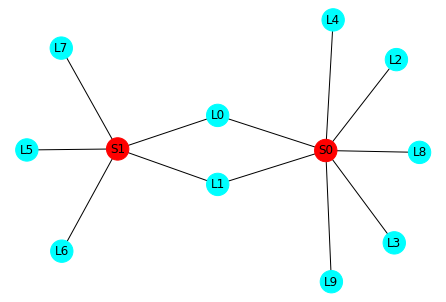

In [14]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [15]:
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Sending the data to the Neuron Object

In [16]:
nru = reload(nru)
save_time = time.time()
neuron_obj.save_compressed_neuron(output_folder="/notebooks/test_neurons/Fusion_decomp/",
                                 export_mesh=True,
                                 suppress_output=True)
print(f"Save time = {time.time() - save_time}")

Saving Neuorn in suppress_output mode...please wait
Saved File at location: /notebooks/test_neurons/Fusion_decomp/864691136739250798_double_soma_inhibit_stretched
Save time = 56.094841957092285


In [17]:
nru = reload(nru)
reload_time = time.time()
recovered_neuron = nru.decompress_neuron(filepath="./12345_double_soma",
                     original_mesh="./12345_double_soma")
print(f"Save time = {time.time() - reload_time}")

Decompressing Neuron in minimal output mode...please wait
Save time = 48.107572078704834


In [18]:
import neuron_visualizations as nviz
returned_colors = nviz.visualize_neuron(recovered_neuron,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L6="all"),
                                       return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
